In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

import plotly.figure_factory as ff
import cufflinks as cf

%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("paper")
plt.style.use('seaborn')

Reading Youtube India data file

In [2]:
videos_df = pd.read_csv('../input/youtube-new/INvideos.csv')

category_df = pd.read_json('../input/youtube-new/IN_category_id.json')

display(videos_df.info())
display(category_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                37352 non-null  object
 1   trending_date           37352 non-null  object
 2   title                   37352 non-null  object
 3   channel_title           37352 non-null  object
 4   category_id             37352 non-null  int64 
 5   publish_time            37352 non-null  object
 6   tags                    37352 non-null  object
 7   views                   37352 non-null  int64 
 8   likes                   37352 non-null  int64 
 9   dislikes                37352 non-null  int64 
 10  comment_count           37352 non-null  int64 
 11  thumbnail_link          37352 non-null  object
 12  comments_disabled       37352 non-null  bool  
 13  ratings_disabled        37352 non-null  bool  
 14  video_error_or_removed  37352 non-null  bool  
 15  de

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   kind    31 non-null     object
 1   etag    31 non-null     object
 2   items   31 non-null     object
dtypes: object(3)
memory usage: 872.0+ bytes


None

In [3]:
# Category data
display(category_df.sample(2))

display(category_df['items'][0])


# Video data
display(videos_df.sample(2))

,kind,etag,items
26,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
24,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


{'kind': 'youtube#videoCategory',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
9521,loDvEBVelHI,18.03.01,2 January 2018 - The Hindu Editorial News Pape...,Study IQ education,27,2018-01-02T02:46:40.000Z,"current affairs 2018|""current affairs""|""curren...",64909,3602,65,478,https://i.ytimg.com/vi/loDvEBVelHI/default.jpg,False,False,False,Happy New Year. 40% Discount on Pendrive & And...
11789,1RgVWW-ujME,18.17.01,Andal Issue : S.Ve.Shekar Slams Tamil Poet Vai...,Thanthi TV,25,2018-01-16T10:57:11.000Z,"Thanthi TV|""ஆண்டாள்""|""வைரமுத்து""|""பேரணி""|""ஸ்ரீ...",58717,680,494,430,https://i.ytimg.com/vi/1RgVWW-ujME/default.jpg,False,False,False,Andal Issue : S.Ve.Shekar Slams Tamil Poet Vai...


Filtering out the category names with respoect to id from the category dataset

In [4]:
# Fetching id and titles from the category dataset
list_id =[]
list_title = []

for index,row in category_df.iterrows():
    x = row['items']
    list_id.append(x['id'])
    list_title.append(x['snippet']['title'])
    
# Creating dataframe of id and title

category_df = pd.DataFrame(zip(list_id,list_title),columns=['category_id','category'])
category_df['category_id'] = category_df['category_id'].astype('int64')
category_df.head(2)

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles


Merging the two dataframes

In [5]:
df = pd.merge(videos_df, category_df, on='category_id',how='inner')

### Exploring the dataset

Famous Categories in which the videos got trended

In [6]:
category_details = df.groupby(['category']).agg({'video_id':'count','views':'sum','likes':'sum','dislikes':'sum','comment_count':'sum'}).reset_index()

fig =px.bar(data_frame=category_details.sort_values(by='video_id', ascending=False), 
           x='category', y='video_id',
           template='plotly_white')
fig.update_layout(
    title={
        'text': "Number of trending videos by category",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

In [7]:
data = [go.Pie(
        labels = category_details['category'],
        values = category_details['video_id'],
        hoverinfo = 'label+value',
        title = 'Percentage of Videos'
    
)]

fig = plotly.offline.iplot(data, filename='category')

In [8]:
data = [go.Pie(
        labels = category_details['category'],
        values = category_details['views'],
        hoverinfo = 'label+value',
        title = '% of Views'
    
)]

plotly.offline.iplot(data, filename='category')

In [9]:
category_details.head(2)

,category,video_id,views,likes,dislikes,comment_count
0,Autos & Vehicles,72,30384725,539571,22284,86488
1,Comedy,3429,2887672070,174114686,6976508,13806968


### Average Viewership/likes/dislikes/comments per video for each category

In [10]:
# Views
views = category_details['views']
videos = category_details['video_id']

average_views = views/videos

# Likes
likes = category_details['likes']
average_likes = np.round(likes/average_views, 3)

# Dislikes
dislikes = category_details['dislikes']
average_dislikes = np.round(dislikes/average_views, 3)

# Comments
comments = category_details['comment_count']
average_comments = np.round(average_views/comments, 3)



category_details['average_views'] = average_views
category_details['average_likes'] = average_likes
category_details['average_dislikes'] = average_dislikes
category_details['average_comments'] = average_comments

category_details.head(2)

,category,video_id,views,likes,dislikes,comment_count,average_views,average_likes,average_dislikes,average_comments
0,Autos & Vehicles,72,30384725,539571,22284,86488,422010.069444,1.279,0.053,4.879
1,Comedy,3429,2887672070,174114686,6976508,13806968,842132.420531,206.755,8.284,0.061


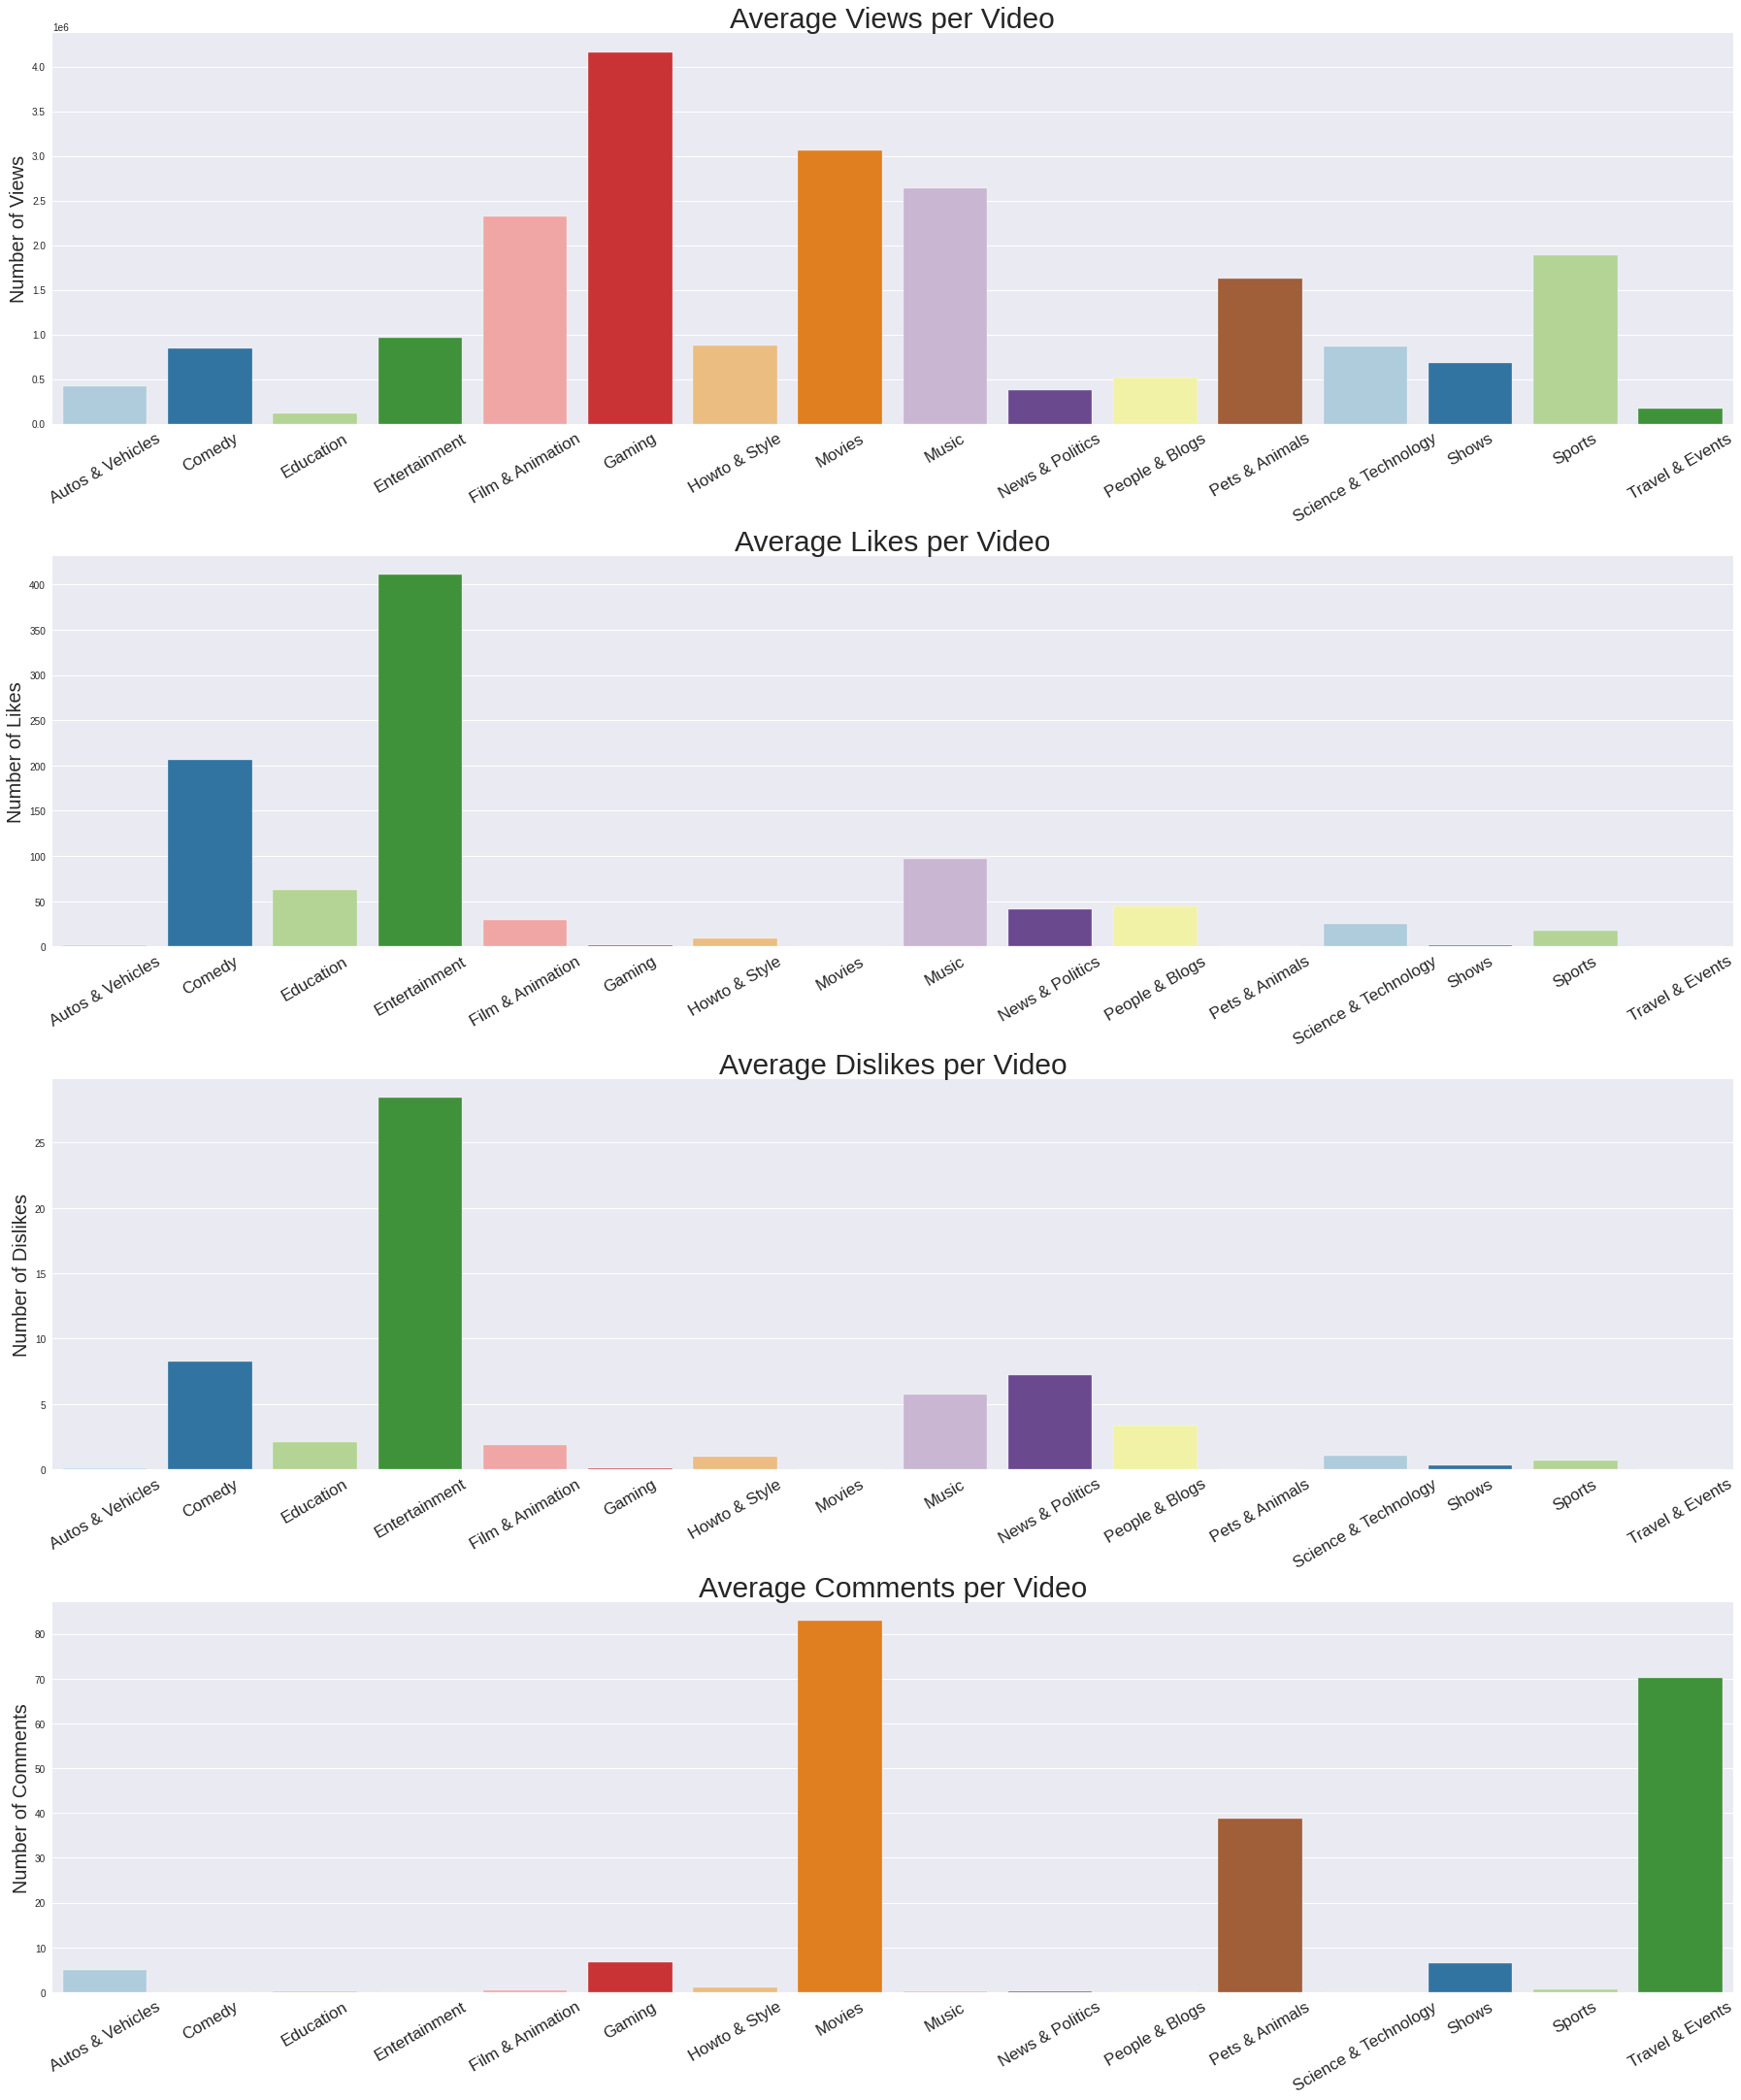

In [11]:
fig = plt.figure(figsize=(25,30))

ax1 = fig.add_subplot(411)
_ = sns.barplot(data=category_details, x='category', y='average_views', palette='Paired', ax=ax1)
xlabels = category_details['category'].to_list()
ylabels = category_details['average_views']
_ = ax1.set_title('Average Views per Video', fontsize=30)
_ = ax1.set_ylabel('Number of Views', fontsize=20)
_ = ax1.set_xlabel('')
_ = ax1.set_xticklabels(xlabels, rotation=30, fontsize=17)


ax2 = fig.add_subplot(412)
_ = sns.barplot(data=category_details, x='category', y='average_likes', palette='Paired', ax=ax2)
xlabels = category_details['category'].to_list()
ylabels = category_details['average_likes']
_ = ax2.set_title('Average Likes per Video', fontsize=30)
_ = ax2.set_ylabel('Number of Likes', fontsize=20)
_ = ax2.set_xlabel('')
_ = ax2.set_xticklabels(xlabels, rotation=30, fontsize=17)


ax3 = fig.add_subplot(413)
_ = sns.barplot(data=category_details, x='category', y='average_dislikes', palette='Paired', ax=ax3)
xlabels = category_details['category'].to_list()
ylabels = category_details['average_dislikes']
_ = ax3.set_title('Average Dislikes per Video', fontsize=30)
_ = ax3.set_ylabel('Number of Dislikes', fontsize=20)
_ = ax3.set_xlabel('')
_ = ax3.set_xticklabels(xlabels, rotation=30, fontsize=17)

ax4 = fig.add_subplot(414)
_ = sns.barplot(data=category_details, x='category', y='average_comments', palette='Paired', ax=ax4)
xlabels = category_details['category'].to_list()
ylabels = category_details['average_comments']
_ = ax4.set_title('Average Comments per Video', fontsize=30)
_ = ax4.set_ylabel('Number of Comments', fontsize=20)
_ = ax4.set_xlabel('')
_ = ax4.set_xticklabels(xlabels, rotation=30, fontsize=17)

fig.tight_layout(pad=0.5)

Observations :
        1. Popular categories based on viwership are Gaming, Movies, Music, Film
        2. People tend to hit the like button more often of trending videos in categories like Entertainment, Comedy, Music
        3. Similar is the case for dislikes including category News & Politics
        4. Most comments per video are for Movies followed by Travel&Events and Pet&Animals
        
* Entertainment category consists the most number of videos but has not performed well in viewvership 
* Gaming and Movies categories have one of the least trending videos in the dataset(India) but have performed well based on average viewership
* Music Industry seems to have performed better in terms of number of trending videos and in viewership

### Channels

Channels having most number of trending videos per category

In [12]:
# Creating a df of num_of trending videos per channel 
trending_channels = df.groupby(['category','channel_title']).size().rename('num_videos').reset_index()

# Picking out the channel with the highest number of trending videos in each category
most_trending = trending_channels[trending_channels.groupby('category')['num_videos'].transform(max) == trending_channels['num_videos']]

most_trending

,category,channel_title,num_videos
1,Autos & Vehicles,Autocar India,17
40,Comedy,ETV Plus India,253
151,Education,Study IQ education,213
788,Entertainment,etvteluguindia,282
840,Film & Animation,Goldmines Telefilms,114
915,Gaming,Clash of Clans,29
919,Howto & Style,5-Minute Crafts,173
965,Movies,Rhythm Boyz,14
1085,Music,T-Series,221
1342,News & Politics,V6 News Telugu,212


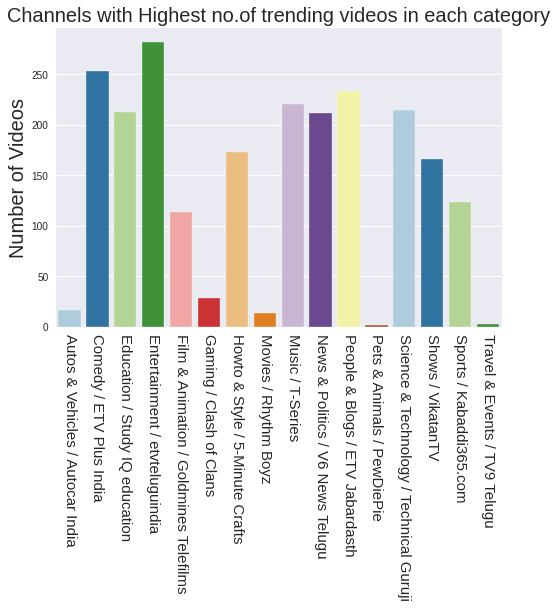

In [13]:
px.bar(data_frame=most_trending, 
           x='channel_title', y='num_videos',
           template='ggplot2',
           title='Channels with Highest no.of trending videos in each category')


fig = sns.barplot(data=most_trending, x='channel_title', y='num_videos', palette='Paired')
xlabels = (most_trending['category']+' / '+most_trending['channel_title']).to_list()
_ = plt.title('Channels with Highest no.of trending videos in each category', fontsize=20)
_ = plt.ylabel('Number of Videos', fontsize=20)
_ = plt.xlabel('')
_ = plt.xticks(np.arange(0,16),xlabels,rotation=270, fontsize=15)

### Working on TAGS

In [14]:
import spacy
nlp = spacy.load('en_core_web_sm')

stop_words = spacy.lang.en.stop_words.STOP_WORDS

def preprocess_text(text):
    doc = nlp(text, disable=['ner','parser'])
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stop_words]
    return ' '.join(a_lemmas)

In [15]:
categories_list = set(df['category'])
tags_category_dict = {}

# Create a dictionary of tags for each category
for category in categories_list:
    print(category)
    temp_tags_data = df[df['category'] == category]['tags']
    temp_tags_str = temp_tags_data.apply(preprocess_text)
    tags_category_dict[category] = temp_tags_str

Shows
News & Politics
Film & Animation
People & Blogs
Gaming
Entertainment
Science & Technology
Sports
Autos & Vehicles
Pets & Animals
Music
Education
Howto & Style
Movies
Comedy
Travel & Events


In [16]:
tags_category_dict['Education'][:5]

34082                  Annaul Ijtema
34083        november current affair
34084    habit highly effective self
34085                               
34086         Adda bank ssc coaching
Name: tags, dtype: object

### Let's see what's trending 

### Music

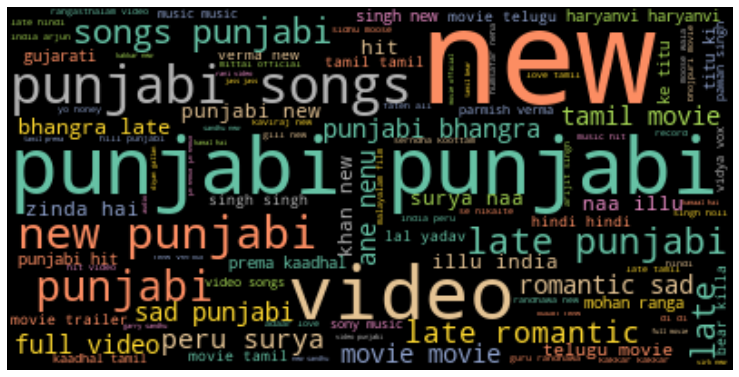

In [17]:
from wordcloud import WordCloud
wc = WordCloud(background_color="black", stopwords=['song'],max_words=100, colormap="Set2")

string = ' '.join(tags_category_dict['Music'])
wc.generate(string.lower())
plt.figure(figsize=(13, 13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Games

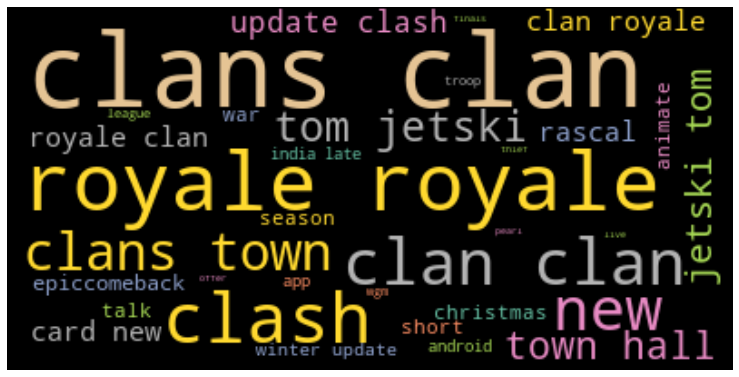

In [18]:
wc = WordCloud(background_color="black", stopwords=['song'],max_words=100, colormap="Set2")

string = ' '.join(tags_category_dict['Gaming'])
wc.generate(string.lower())
plt.figure(figsize=(13, 13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Comedy

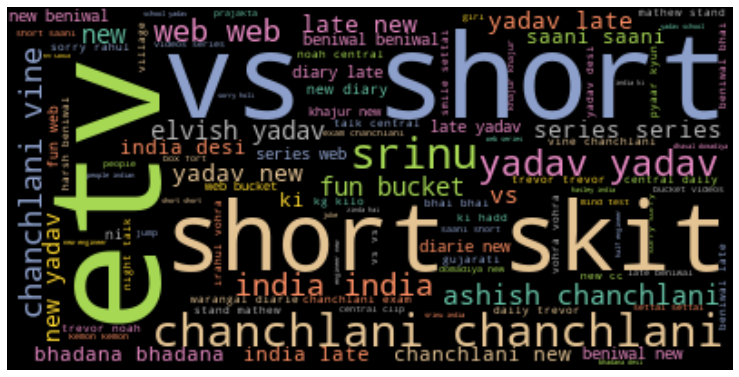

In [19]:
wc = WordCloud(background_color="black", stopwords=['comedy','video','funny'],max_words=100, colormap="Set2")

string = ' '.join(tags_category_dict['Comedy'])
wc.generate(string.lower())
plt.figure(figsize=(13, 13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### News and Politics

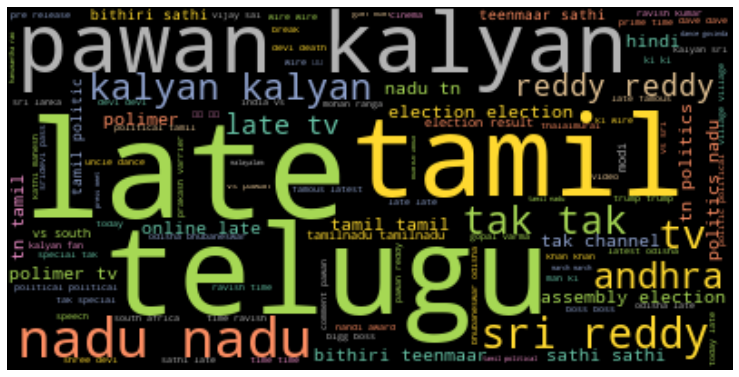

In [20]:
wc = WordCloud(background_color="black", stopwords=['new','news','live'],max_words=100, colormap="Set2")

string = ' '.join(tags_category_dict['News & Politics'])
wc.generate(string.lower())
plt.figure(figsize=(13, 13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()



### Sports

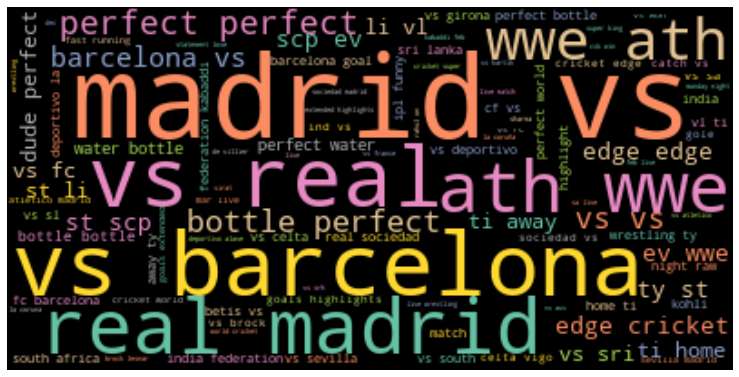

In [21]:
wc = WordCloud(background_color="black", stopwords=['sports'],max_words=100, colormap="Set2")

string = ' '.join(tags_category_dict['Sports'])
wc.generate(string.lower())
plt.figure(figsize=(13, 13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Science and Technology

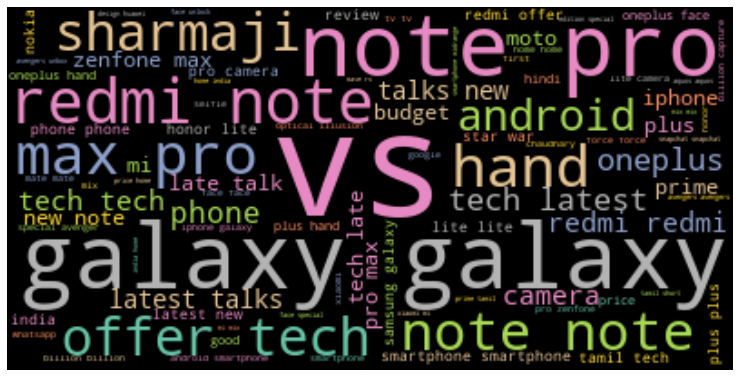

In [22]:
wc = WordCloud(background_color="black", stopwords=['sports'],max_words=100, colormap="Set2")

string = ' '.join(tags_category_dict['Science & Technology'])
wc.generate(string.lower())
plt.figure(figsize=(13, 13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Auto and Vehicles

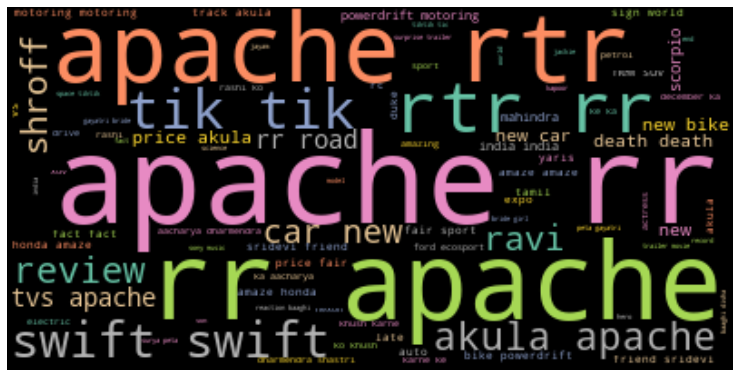

In [23]:
wc = WordCloud(background_color="black", stopwords=['sports'],max_words=100, colormap="Set2")

string = ' '.join(tags_category_dict['Autos & Vehicles'])
wc.generate(string.lower())
plt.figure(figsize=(13, 13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Education

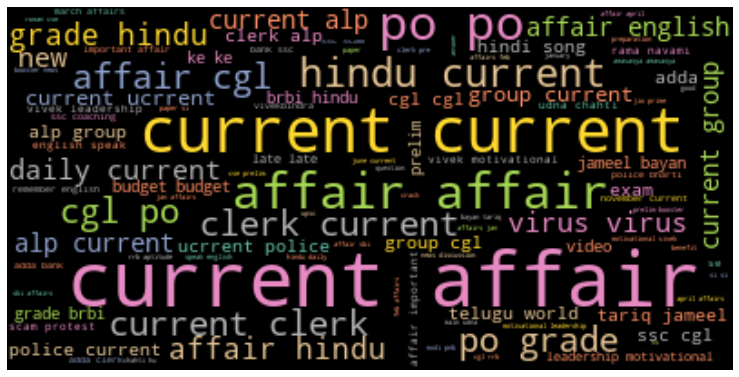

In [24]:
wc = WordCloud(background_color="black", stopwords=['sports'],max_words=100, colormap="Set2")

string = ' '.join(tags_category_dict['Education'])
wc.generate(string.lower())
plt.figure(figsize=(13, 13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()